## Classification using embeddings

There are many ways to classify text. This notebook shares an example of text classification using embeddings. For many text classification tasks, we've seen fine-tuned models do better than embeddings. See an example of fine-tuned models for classification in [Fine-tuned_classification.ipynb](Fine-tuned_classification.ipynb). We also recommend having more examples than embedding dimensions, which we don't quite achieve here.

In this text classification task, we predict the score of a food review (1 to 5) based on the embedding of the review's text. We split the dataset into a training and a testing set for all the following tasks, so we can realistically evaluate performance on unseen data. The dataset is created in the [Obtain_dataset Notebook](Obtain_dataset.ipynb).


In [3]:
# imports
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# load data
datafile_path = "data/fine_food_reviews_with_embeddings_1k.csv"

df = pd.read_csv(datafile_path)
df["embedding"] = df.embedding.apply(eval).apply(np.array)  # convert string to array

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    list(df.embedding.values), df.Score, test_size=0.2, random_state=42
)

# train random forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

report = classification_report(y_test, preds)
print(report)


              precision    recall  f1-score   support

           1       0.88      0.35      0.50        20
           2       1.00      0.38      0.55         8
           3       1.00      0.18      0.31        11
           4       0.88      0.26      0.40        27
           5       0.75      1.00      0.86       134

    accuracy                           0.77       200
   macro avg       0.90      0.43      0.52       200
weighted avg       0.80      0.77      0.72       200



We can see that the model has learnt to distinguish between the categories decently. 5-star reviews show the best performance overall, and this is not too surprising, since they are the most common in the dataset.

RandomForestClassifier() - Average precision score over all classes: 0.87


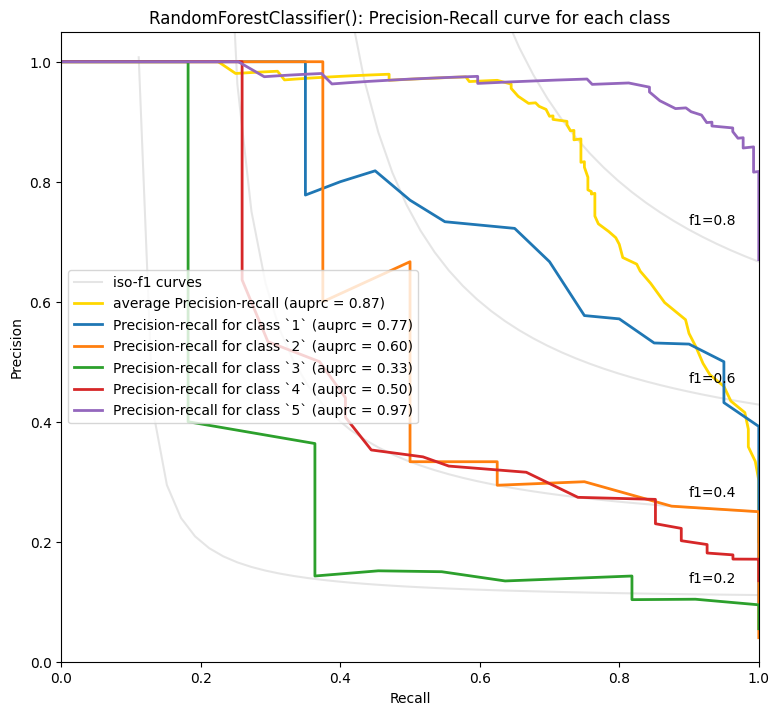

In [4]:
from openai.embeddings_utils import plot_multiclass_precision_recall

plot_multiclass_precision_recall(probas, y_test, [1, 2, 3, 4, 5], clf)


Unsurprisingly 5-star and 1-star reviews seem to be easier to predict. Perhaps with more data, the nuances between 2-4 stars could be better predicted, but there's also probably more subjectivity in how people use the inbetween scores.